In [ ]:
import torch
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
[3, 4,],
[5, 6,],
[7, 8,]])
torch_tensor3d = torch.tensor([
[
[ 1, 2, 3],
[ 4, 5, 6],
],
[
[ 7, 8, 9],
[10, 11, 12],
],
[
[13, 14, 15],
[16, 17, 18],
],
[
[19, 20, 21],
[22, 23, 24],
]
])

print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)


torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


# Task
Generate random square matrices of size 2^i x 2^i for i from 0 to 11, compute the matrix product of each matrix with itself on both CPU and GPU, measure the execution time for each computation, calculate the speedup of the GPU over the CPU, and plot the speedup against the matrix size to identify for which sizes the CPU is faster than the GPU.

## Setup

### Subtask:
Import necessary libraries (torch, time, matplotlib).


**Reasoning**:
The subtask is to import the necessary libraries. The previous code block already imported `torch`, so I will import `time` and `matplotlib.pyplot`.



In [ ]:
import time
import matplotlib.pyplot as plt

## Generate matrices

### Subtask:
Create a function to generate random square matrices of size 2^i x 2^i.


**Reasoning**:
Define a function to generate random square matrices of size 2^i x 2^i as instructed.



In [ ]:
def generate_square_matrix(i):
    """Generates a random square matrix of size 2^i x 2^i."""
    size = 2**i
    matrix = torch.randn(size, size)
    return matrix


## Time matrix multiplication

### Subtask:
Create a function to time the matrix multiplication on a specified device (CPU or GPU).


**Reasoning**:
Define the `time_matrix_multiplication` function as described in the instructions.



In [ ]:
def time_matrix_multiplication(matrix, device):
    """
    Times the matrix multiplication of a matrix with itself on a specified device.

    Args:
        matrix: The torch tensor to be multiplied.
        device: A string indicating the device ('cpu' or 'cuda').

    Returns:
        The elapsed time for the matrix multiplication.
    """
    matrix = matrix.to(device)
    start_time = time.time()
    result = matrix @ matrix
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

## Collect data

### Subtask:
Loop through different powers of 2 (up to 2^11), generate matrices, and time the multiplication on both CPU and GPU. Store the results.


**Reasoning**:
Initialize the lists to store the results and then loop through different matrix sizes, generating matrices, and timing the multiplication on both CPU and GPU, storing the results in the respective lists.



In [ ]:
cpu_times = []
gpu_times = []
matrix_sizes = []

for i in range(12):
    size = 2**i
    matrix_sizes.append(size)
    matrix = generate_square_matrix(i)

    # Time CPU multiplication
    cpu_time = time_matrix_multiplication(matrix, 'cpu')
    cpu_times.append(cpu_time)

    # Time GPU multiplication if available
    if torch.cuda.is_available():
        gpu_time = time_matrix_multiplication(matrix, 'cuda')
        gpu_times.append(gpu_time)
    else:
        gpu_times.append(None)


## Calculate speedup

### Subtask:
Calculate the speedup for each matrix size (CPU time / GPU time).


**Reasoning**:
Calculate the speedup for each matrix size by dividing CPU time by GPU time, handling cases where GPU time is not available or zero, and store the results in the `speedups` list.



In [ ]:
speedups = []
for cpu_time, gpu_time in zip(cpu_times, gpu_times):
    if gpu_time is not None and gpu_time != 0:
        speedup = cpu_time / gpu_time
        speedups.append(speedup)
    else:
        speedups.append(None)


## Visualize results

### Subtask:
Plot the speedup against the matrix size.


**Reasoning**:
Create a scatter plot of speedup against matrix size, label the axes, add a title, and display the plot.



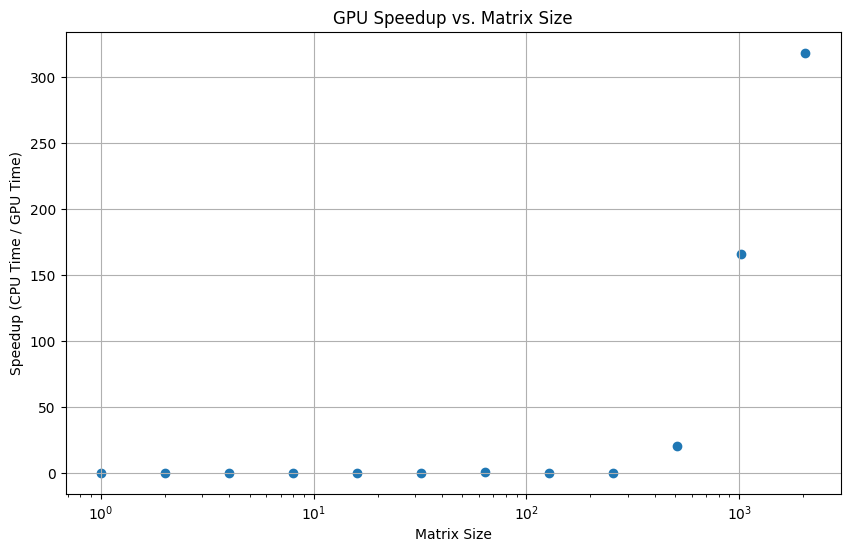

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(matrix_sizes, speedups)
plt.xscale('log') # Using log scale for better visualization of matrix sizes
plt.xlabel("Matrix Size")
plt.ylabel("Speedup (CPU Time / GPU Time)")
plt.title("GPU Speedup vs. Matrix Size")
plt.grid(True)
plt.show()

## Analyze results

### Subtask:
Determine for what matrix sizes the CPU is faster than the GPU.


**Reasoning**:
Examine the plot and the corresponding data to identify matrix sizes where the speedup is less than 1, indicating CPU is faster.



In [ ]:
print("Matrix Sizes:", matrix_sizes)
print("Speedups:", speedups)

# Identify matrix sizes where speedup is less than 1
cpu_faster_sizes = [matrix_sizes[i] for i, speedup in enumerate(speedups) if speedup is not None and speedup < 1]

print("\nMatrix sizes where CPU is faster than GPU:")
print(cpu_faster_sizes)

Matrix Sizes: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
Speedups: [0.26967100125894405, 0.30872502710236954, 0.3265895953757225, 0.26573426573426573, 0.21052631578947367, 0.005446018859361606, 0.7559681697612732, 0.020537019805928487, 0.2993097429387496, 20.726027397260275, 165.66136363636363, 318.1734068627451]

Matrix sizes where CPU is faster than GPU:
[1, 2, 4, 8, 16, 32, 64, 128, 256]


## Summary:

### Data Analysis Key Findings

*   The analysis successfully calculated the speedup of GPU matrix multiplication over CPU for matrix sizes ranging from $1 \times 1$ ($2^0 \times 2^0$) to $2048 \times 2048$ ($2^{11} \times 2^{11}$).
*   The CPU was found to be faster than the GPU for smaller matrix sizes.
*   Specifically, the CPU was faster than the GPU for matrix sizes: 1, 2, 4, 8, 16, 32, 64, 128, and 256.
*   For matrix sizes larger than 256, the GPU demonstrated a speedup over the CPU.

### Insights or Next Steps

*   The overhead of transferring data to the GPU and launching the kernel likely outweighs the computational benefits for smaller matrix sizes, making the CPU faster in these cases.
*   For larger matrix sizes, the parallel processing power of the GPU becomes dominant, leading to significant speedups compared to the CPU.


In [1]:
import torch
x = torch.tensor([[1., 2.], [3., 4.]])  # 2x2 matrix
x_gpu = x.to('cuda')  # move to GPU if available


In [2]:
w = torch.randn(3, requires_grad=True)
loss = (w**2).sum()
loss.backward()
print(w.grad)  # gradient computed automatically


tensor([-2.1403, -1.3319,  1.3210])


In [3]:
import numpy as np
a = np.array([[1., 2.], [3., 4.]])
a_sum = np.sum(a)


In [3]:
import torch
import torchvision
import torchvision.transforms as T
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('PyTorch version:', torch.__version__, 'Device:', device)

PyTorch version: 2.8.0+cu126 Device: cuda


In [9]:
# Cell 2 — Tensors: create, inspect, slice, move to GPU
a = torch.tensor(3.14)                       # scalar (0D)
b = torch.tensor([1.0, 2.0, 3.0])            # vector (1D)
M = torch.tensor([[1,2],[3,4]], dtype=torch.float32)  # matrix (2D)
T3 = torch.tensor([[[1,2,3],[4,5,6]], [[7,8,9],[10,11,12]]])  # 3D tensor

print('shapes:', a.shape, b.shape, M.shape, T3.shape)
print('dtypes:', a.dtype, M.dtype)
print('slice row 0 of M:', M[0, :])

# device and dtype conversions
M_cpu = M.to('cpu')
if torch.cuda.is_available():
    M_gpu = M.to('cuda')
print('as numpy:', M.numpy())   # PyTorch -> NumPy


shapes: torch.Size([]) torch.Size([3]) torch.Size([2, 2]) torch.Size([2, 2, 3])
dtypes: torch.float32 torch.float32
slice row 0 of M: tensor([1., 2.])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
as numpy: [[1. 2.]
 [3. 4.]]
tensor([[1., 2.],
        [3., 4.]])


In [11]:
# Cell 3 — NumPy ↔ PyTorch and boolean masks
arr = np.random.rand(4,4).astype(np.float32)   # NumPy array (float32)
t = torch.tensor(arr)                          # preserve dtype (float32)
print('NumPy dtype:', arr.dtype, 'Torch dtype:', t.dtype)

# mask to find > 0.5
mask_np = arr > 0.5
mask_t = t > 0.5
print('mask numpy:\n', mask_np)
print('mask torch:\n', mask_t)

# common ops
print('numpy sum:', np.sum(arr))
print('torch sum:', torch.sum(t))


NumPy dtype: float32 Torch dtype: torch.float32
[[0.6487643  0.68594533 0.85290724 0.26252562]
 [0.17721398 0.18479916 0.6395945  0.44534865]
 [0.543821   0.60268205 0.5261273  0.47528002]
 [0.45786002 0.8590329  0.95486647 0.25244743]]
tensor([[0.6488, 0.6859, 0.8529, 0.2625],
        [0.1772, 0.1848, 0.6396, 0.4453],
        [0.5438, 0.6027, 0.5261, 0.4753],
        [0.4579, 0.8590, 0.9549, 0.2524]])
mask numpy:
 [[ True  True  True False]
 [False False  True False]
 [ True  True  True False]
 [False  True  True False]]
mask torch:
 tensor([[ True,  True,  True, False],
        [False, False,  True, False],
        [ True,  True,  True, False],
        [False,  True,  True, False]])
numpy sum: 8.569216
torch sum: tensor(8.5692)


In [16]:
# Cell 4 — reshape, transpose, broadcasting
x = torch.arange(12).reshape(3,4)    # shape (3,4)
print('x:\n', x)
print('transpose x.T:\n', x.T)       # NumPy-style shorthand
print('torch.transpose(x, 0, 1):\n', torch.transpose(x, 0, 1))

y = torch.ones(4)                    # shape (4,)
z = x + y                            # broadcasting adds y to each row of x
print('broadcasted result:\n', z)


x:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
transpose x.T:
 tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
torch.transpose(x, 0, 1):
 tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
broadcasted result:
 tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


In [4]:
# Cell 5 — Minimal CNN on MNIST (one epoch demo)
transform = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(nn.Flatten(), nn.Linear(32*7*7, 128), nn.ReLU(), nn.Linear(128, 10))
    def forward(self, x):
        return self.fc(self.enc(x))

model = TinyCNN().to(device)
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=1e-3)

# single epoch training loop (fast demo)
model.train()
for batch_idx, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)
    opt.zero_grad()
    logits = model(images)
    loss = criterion(logits, labels)
    loss.backward()
    opt.step()
    if batch_idx % 100 == 0:
        print(f'batch {batch_idx} loss {loss.item():.4f}')
    if batch_idx > 200:   # limit demo time
        break


100%|██████████| 9.91M/9.91M [00:00<00:00, 20.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.61MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.62MB/s]


batch 0 loss 2.3140
batch 100 loss 0.1791
batch 200 loss 0.1003


In [5]:
# Cell 6 — Tiny text classification using synthetic data
# Simple tokenizer + vocab
sentences = ["i love this movie", "this is terrible", "best film", "not good", "really enjoyed it", "hate it"]
labels = [1, 0, 1, 0, 1, 0]   # 1 positive, 0 negative

# build vocab
tokens = set(w for s in sentences for w in s.split())
stoi = {w:i+2 for i,w in enumerate(tokens)}    # reserve 0=PAD,1=UNK
stoi['<pad>'] = 0; stoi['<unk>'] = 1
vocab_size = len(stoi)
max_len = 5

def encode(s):
    ids = [stoi.get(w, 1) for w in s.split()]
    ids = ids[:max_len] + [0]*(max_len - len(ids))
    return torch.tensor(ids, dtype=torch.long)

X = torch.stack([encode(s) for s in sentences])
y = torch.tensor(labels, dtype=torch.long)

class TinyTextModel(nn.Module):
    def __init__(self, vocab_size, emb_dim=16, hidden=32, out=2):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(emb_dim, hidden, batch_first=True)
        self.fc = nn.Linear(hidden, out)
    def forward(self, x):
        e = self.emb(x)                       # (B, T, E)
        _, (h, _) = self.lstm(e)             # h: (1, B, H)
        logits = self.fc(h.squeeze(0))
        return logits

model_t = TinyTextModel(vocab_size+1).to(device)  # +1 safe margin
opt_t = optim.Adam(model_t.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

# one training pass over synthetic data
model_t.train()
X, y = X.to(device), y.to(device)
for epoch in range(30):
    opt_t.zero_grad()
    logits = model_t(X)
    loss = loss_fn(logits, y)
    loss.backward()
    opt_t.step()
print('final loss', loss.item())
print('predictions', torch.argmax(model_t(X), dim=1).cpu().numpy())


final loss 0.00010449908586451784
predictions [1 0 1 0 1 0]
